## Profile & explore the data

In [81]:
import pandas as pd

In [ ]:
# import data
churn = pd.read_csv("Bank+Customer+Churn/Bank_Churn.csv")

# explore the first few rows

churn.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:

churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
# Geography and Gender are object data type. 
# No Na values.

In [ ]:
# calculate statistics for each feature
churn.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# 20% of customers exicted. The data is imbalanced, which might need to be considered in modeling, but it is not extreme. 
# age range from 18 and 92, which is meaningful. Range for other features seems valid as well. 

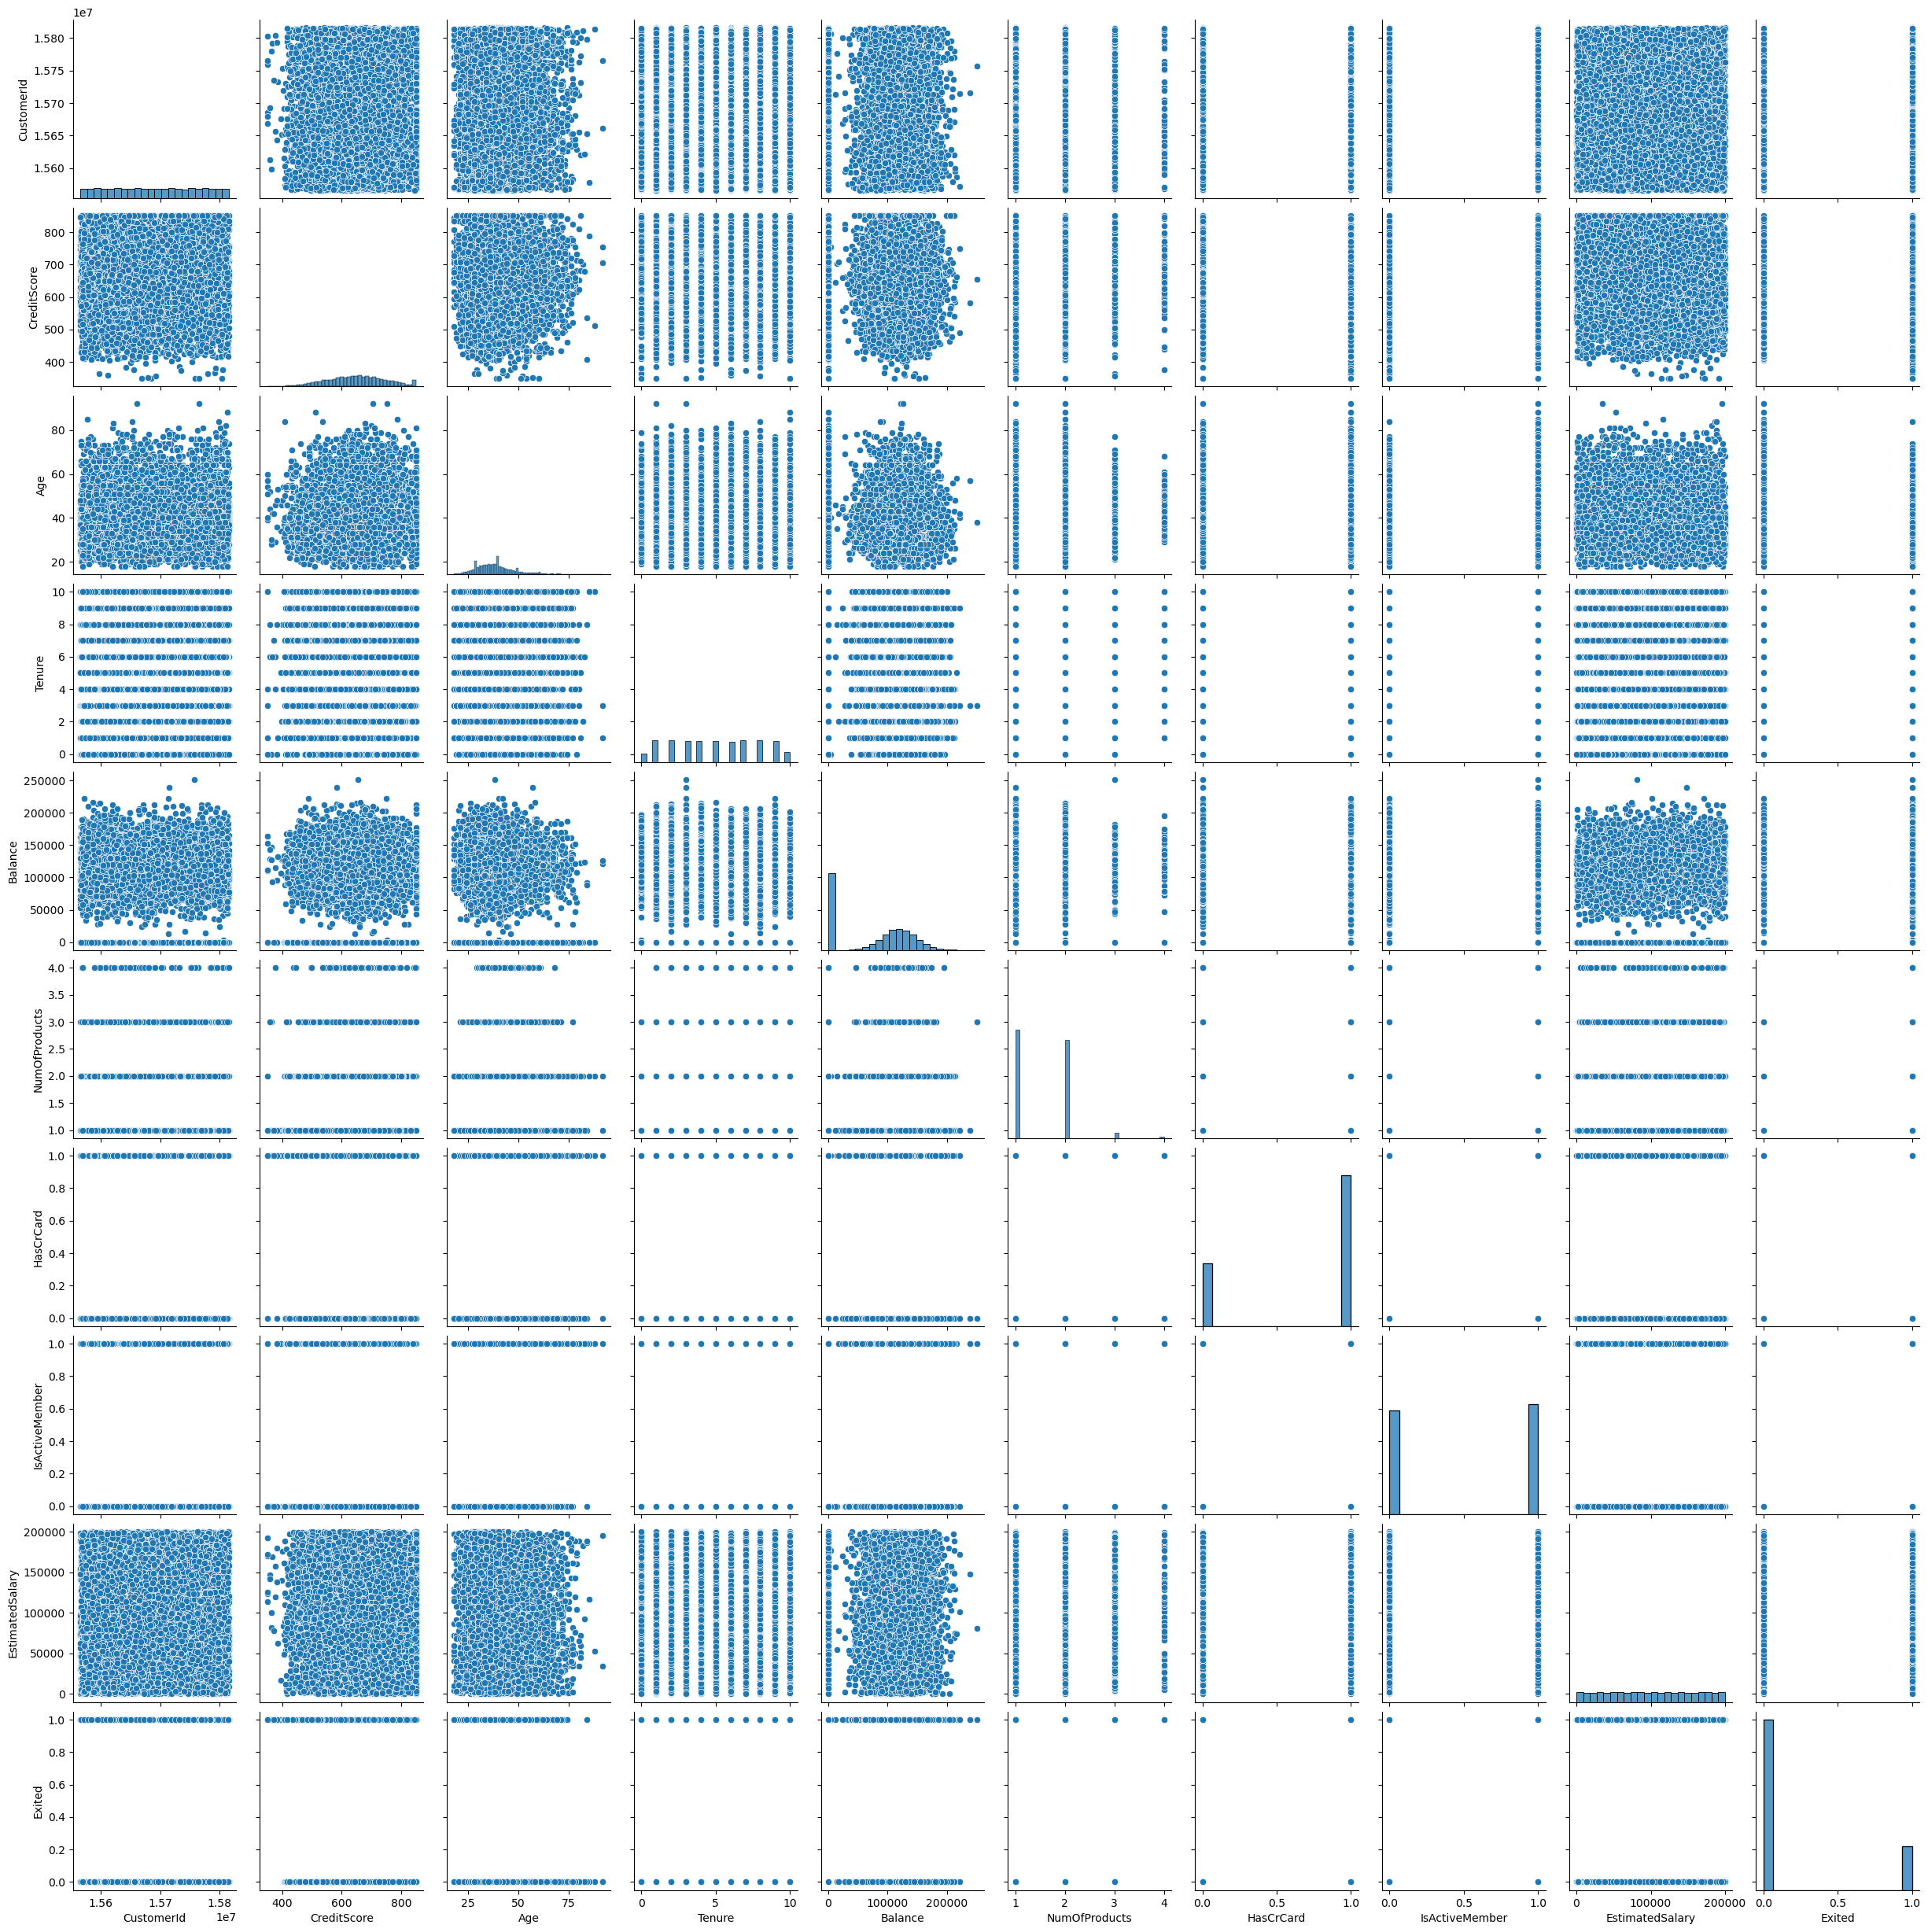

In [ ]:
# build a scatterplot matrix to find relationships between all pairs of numeric columns
import seaborn as sns
sns.pairplot(churn)

In [ ]:
# We don't see too many highly correlated variables and they are too noisy, and not much inisght was gained out of it. 

<Axes: >

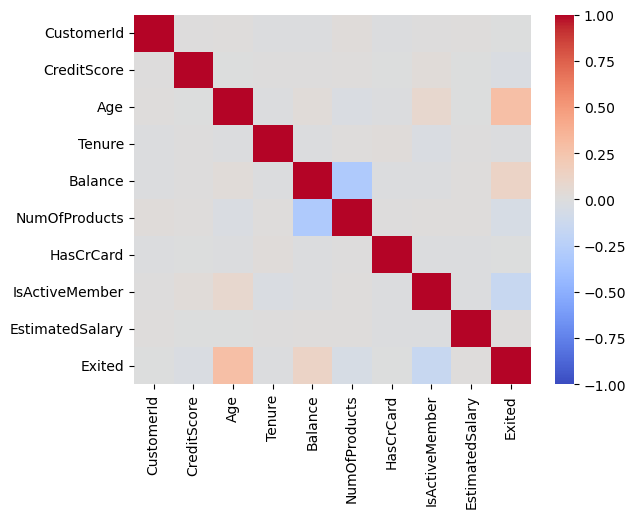

In [ ]:
# build box plots for each column broken out by the target variable, "Exited"
sns.heatmap(churn.corr(numeric_only=True), vmin=-1, vmax=1, cmap="coolwarm")

In [ ]:
# no  extreme colinearity was observed. 


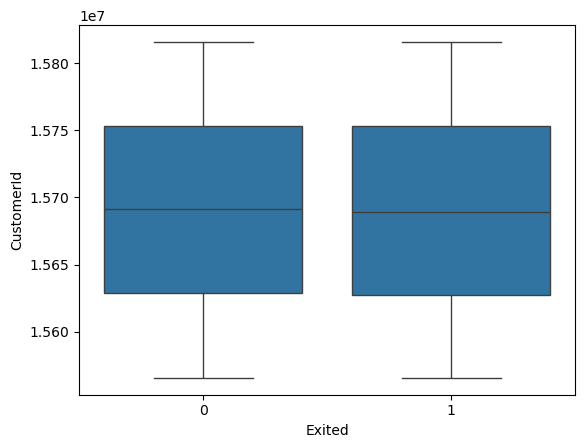

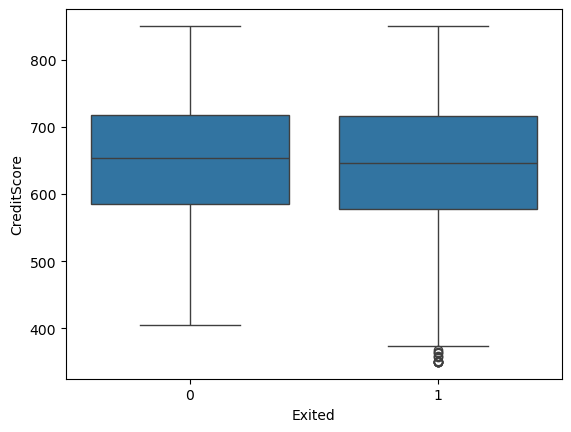

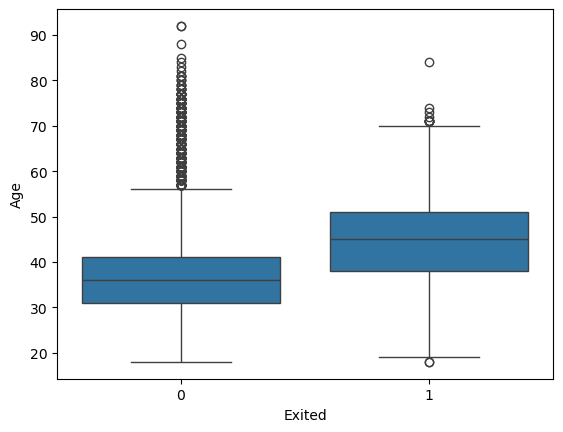

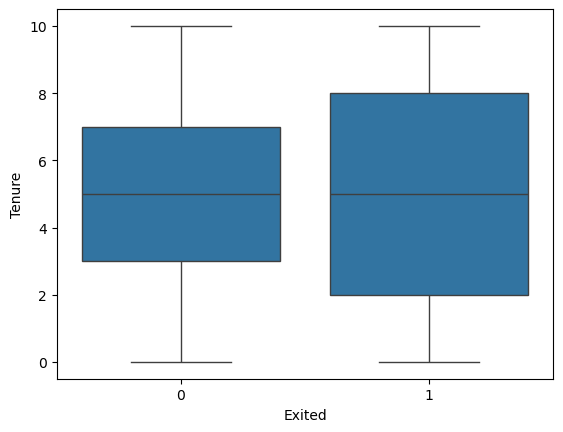

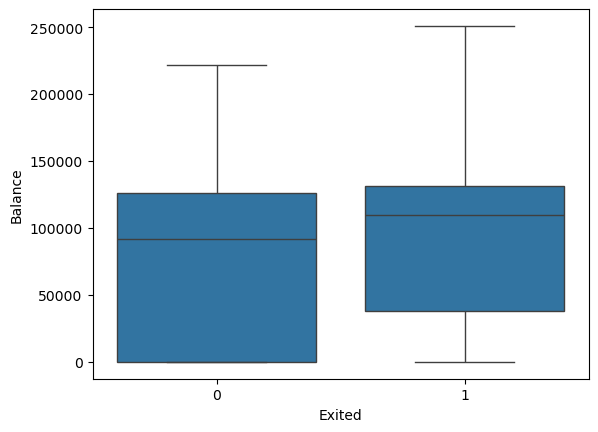

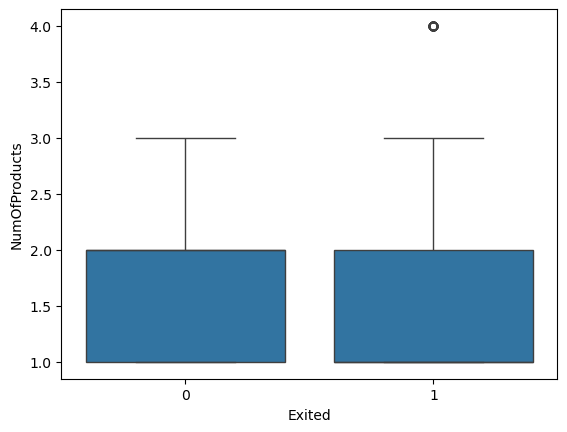

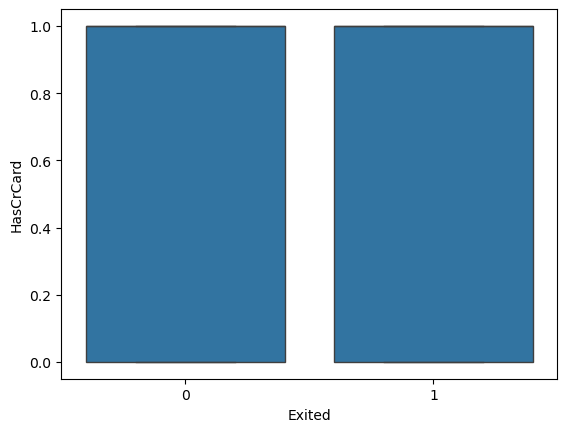

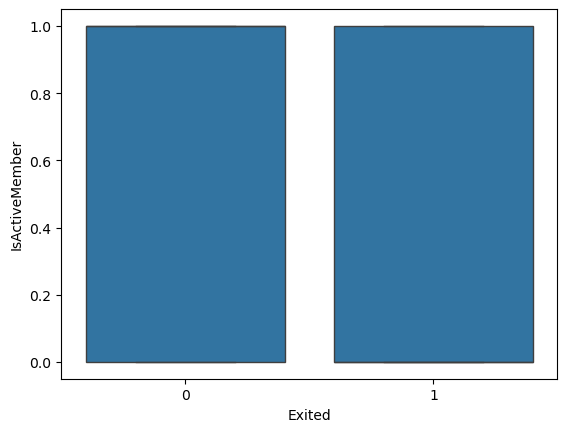

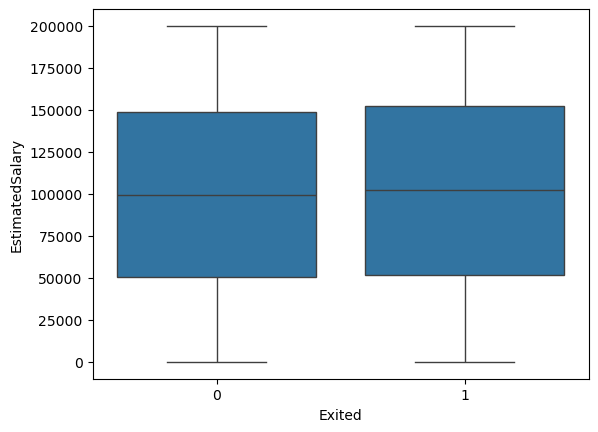

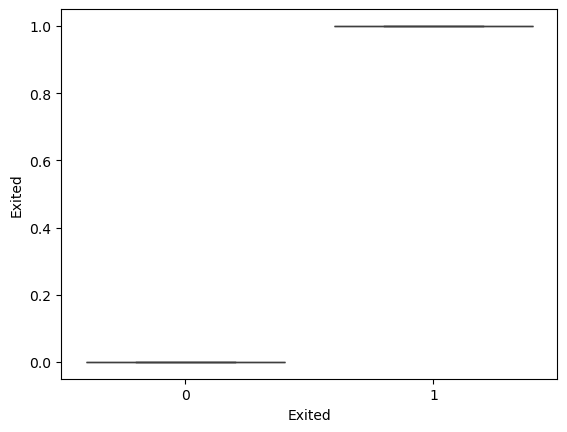

In [ ]:
# build bar charts that show the percentage of "Exited" by category for each numerical column. 
import matplotlib.pyplot as plt

for col in churn.select_dtypes("number"):
    sns.boxplot(data=churn, x='Exited', y=col)
    plt.show()

In [ ]:
# customerid to be dropeed. 
# age is something that stands out and we notice a difference in each category. 
# The difference in mean in each class of churners and non-churners is around 10 years, which is significant.

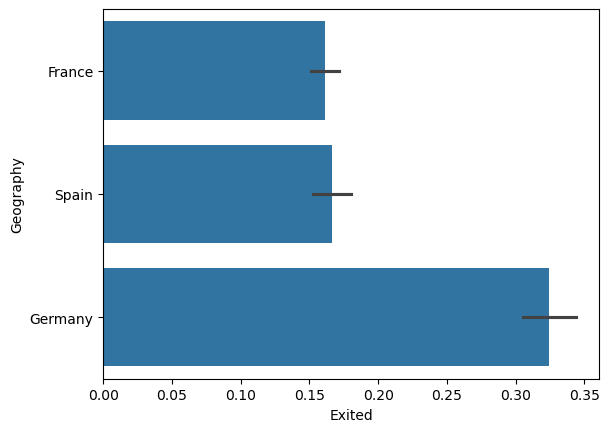

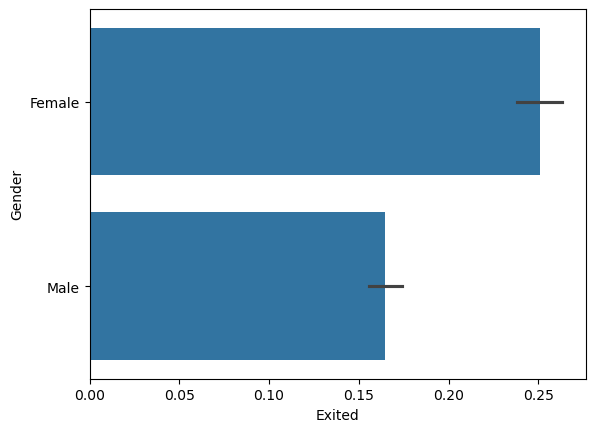

In [ ]:
# # build bar charts that show the percentage of "Exited" by category for each object/categorical column. 
for col in churn.select_dtypes("object").columns[1:]:
    sns.barplot(data=churn, x='Exited', y=col)
    plt.show()

In [ ]:
# Germany has higher range of churn. A significant predictor.
# Also, Gender seems to be a good predictor. 


## Preparing for Modelling
### Feature Engineering

In [89]:
# Drop columns that aren't suitable for modeling
churn_modelling_df = churn.drop(['CustomerId', 'Surname'], axis = 1)

In [ ]:

# create a new column "balance_to_income" by deviding "Balance" by "EstimatedSalary"
# create a new column "income_v_products" by deviding "EstimatedSalary" by "NumOfProducts"

churn_modelling_df = churn_modelling_df.assign(
    balance_to_income = churn_modelling_df['Balance'] / churn_modelling_df['EstimatedSalary'],
    income_v_products = churn_modelling_df['EstimatedSalary'] / churn_modelling_df["NumOfProducts"]
)

churn_modelling_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_to_income,income_v_products
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,101348.880
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,112542.580
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,37977.190
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,46913.315
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,79084.100


<Axes: xlabel='Exited', ylabel='balance_to_income'>

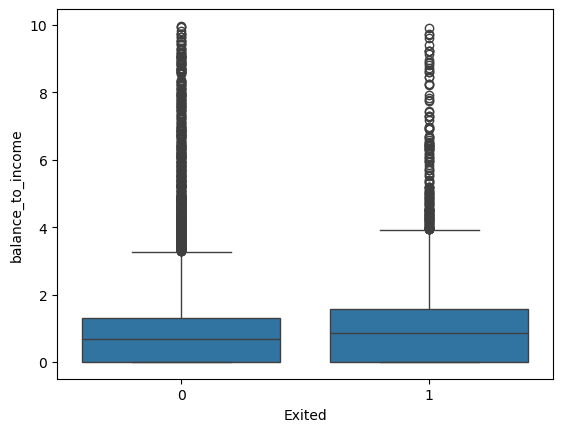

In [ ]:
#looking at our new features

sns.boxplot(churn_modelling_df.query('balance_to_income < 10'), x='Exited', y = 'balance_to_income')

In [ ]:
# churners looks to have a slightly higher balance_to_income 

<Axes: xlabel='Exited', ylabel='income_v_products'>

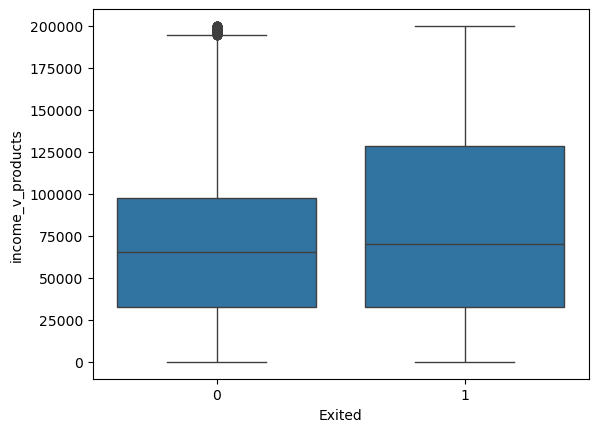

In [92]:
# looking at our new feature
sns.boxplot(churn_modelling_df, x='Exited', y = 'income_v_products')

In [ ]:
# This could be promissing as there is difference in distributions. 

In [ ]:
# create dummy variables(one-hot-encode) for categorical variables. 

churn_modelling_df = pd.get_dummies(churn_modelling_df, drop_first=True, dtype='int')

churn_modelling_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_to_income,income_v_products,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.000000,101348.880,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.744677,112542.580,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.401375,37977.190,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0.000000,46913.315,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1.587055,79084.100,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0.000000,48135.320,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0.564108,101699.770,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0.000000,42085.580,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0.808230,46444.260,1,0,1


In [ ]:
# New features(one-hot-encoded): Geography_German, Geography_Spain and Gender_Male


In [ ]:
# split the data into train and test sets, with 20% of the rows in the test set. 

from sklearn.model_selection import train_test_split

X = churn_modelling_df.drop('Exited', axis=1)
y = churn_modelling_df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 8276 to 7816
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        8000 non-null   int64  
 1   Age                8000 non-null   int64  
 2   Tenure             8000 non-null   int64  
 3   Balance            8000 non-null   float64
 4   NumOfProducts      8000 non-null   int64  
 5   HasCrCard          8000 non-null   int64  
 6   IsActiveMember     8000 non-null   int64  
 7   EstimatedSalary    8000 non-null   float64
 8   balance_to_income  8000 non-null   float64
 9   income_v_products  8000 non-null   float64
 10  Geography_Germany  8000 non-null   int64  
 11  Geography_Spain    8000 non-null   int64  
 12  Gender_Male        8000 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 875.0 KB


In [95]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 8374 to 8466
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        2000 non-null   int64  
 1   Age                2000 non-null   int64  
 2   Tenure             2000 non-null   int64  
 3   Balance            2000 non-null   float64
 4   NumOfProducts      2000 non-null   int64  
 5   HasCrCard          2000 non-null   int64  
 6   IsActiveMember     2000 non-null   int64  
 7   EstimatedSalary    2000 non-null   float64
 8   balance_to_income  2000 non-null   float64
 9   income_v_products  2000 non-null   float64
 10  Geography_Germany  2000 non-null   int64  
 11  Geography_Spain    2000 non-null   int64  
 12  Gender_Male        2000 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 218.8 KB


## Build & Evaluate a Logistic Regression

In [96]:
# fit a logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

lr = logreg.fit(X_train, y_train)

print(f"Train Accuracy: {lr.score(X_train, y_train)}")

Train Accuracy: 0.79


/home/moa/miniconda3/envs/new_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [97]:
# try increasing the max_iter

logreg = LogisticRegression(max_iter=5000)

lr = logreg.fit(X_train, y_train)

print(f"Train Accuracy: {lr.score(X_train, y_train)}")

Train Accuracy: 0.817875


/home/moa/miniconda3/envs/new_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [98]:
# try increasing the max_iter to get a better accuracy

logreg = LogisticRegression(max_iter=100000)

lr = logreg.fit(X_train, y_train)

print(f"Train Accuracy: {lr.score(X_train, y_train)}")

Train Accuracy: 0.815


/home/moa/miniconda3/envs/new_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [99]:
# as we didn't get much better accuracy, we would like to test another solver
# The "newton-cholesky" solver is a good choice when n_samples >> n_features, which is the case here

logreg = LogisticRegression(solver='newton-cholesky')

lr = logreg.fit(X_train, y_train)

print(f"Train Accuracy: {lr.score(X_train, y_train)}")

Train Accuracy: 0.817


In [100]:
# build a confusion matrix & calculate training accuracy to evaluate the model
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

confusion_matrix(y_train, lr.predict(X_train))

array([[6119,  253],
       [1211,  417]])

In [101]:
# calculate precision
precision_score(y_train, lr.predict(X_train))

0.6223880597014926

In [102]:
# calculate recall
recall_score(y_train, lr.predict(X_train))

0.25614250614250617

In [103]:
# take a look at our coefficients 

list(zip(X_train, lr.coef_[0]))

[('CreditScore', -0.00091871111290644),
 ('Age', 0.07348670677437194),
 ('Tenure', -0.015723073221588724),
 ('Balance', 2.159495227819862e-06),
 ('NumOfProducts', 0.7986881910560669),
 ('HasCrCard', -0.11739952340062877),
 ('IsActiveMember', -1.0796835443611243),
 ('EstimatedSalary', -1.7153764609830566e-05),
 ('balance_to_income', 0.0005748891887945849),
 ('income_v_products', 2.2213179944336808e-05),
 ('Geography_Germany', 0.7955740153693516),
 ('Geography_Spain', 0.035513084515640586),
 ('Gender_Male', -0.4993144026831345)]

In [104]:
# Feature Selection: droping columns with low impact and evaluate the model

X_train2 = X_train.drop(["Balance", "EstimatedSalary", "income_v_products"], axis=1)

In [ ]:
# fit the model with new X_train: X_train2
logreg = LogisticRegression(solver='newton-cholesky')

lr = logreg.fit(X _train2, y_train)

print(f"Train Accuracy: {lr.score(X_train2, y_train)}")

Train Accuracy: 0.81425


In [106]:
# calculate precision for X_train2
precision_score(y_train, lr.predict(X_train2))

0.6195286195286195

In [107]:
# calculate recall for X_train2
recall_score(y_train, lr.predict(X_train2))

0.22604422604422605

We didn't achieve better performance by feature engineering, therefore, we contiune with our original model: X_train

In [108]:
# refit the model to X_train
logreg = LogisticRegression(solver='newton-cholesky')

lr = logreg.fit(X_train, y_train)

print(f"Train Accuracy: {lr.score(X_train, y_train)}")

Train Accuracy: 0.817


In [109]:
# performance on test data

confusion_matrix(y_test, lr.predict(X_test))

array([[1536,   55],
       [ 320,   89]])

In [110]:
print(f"Test Accuracy: {lr.score(X_test, y_test)}")

Test Accuracy: 0.8125


In [111]:
precision_score(y_test, lr.predict(X_test))

0.6180555555555556

In [112]:
recall_score(y_test, lr.predict(X_test))

0.2176039119804401

In [ ]:
f1_score(y_test, lr.predict(X_test))

0.321880650994575

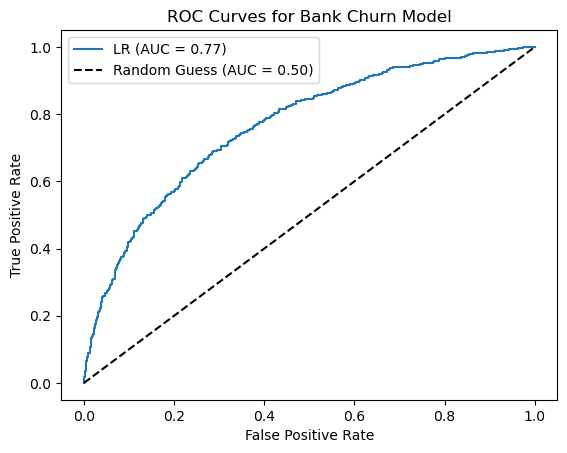

In [ ]:
# plot AUC, ROC curve
from sklearn.metrics import roc_curve, auc 

y_probs = lr.predict_proba(X_test)[:, 1]
fpr1, tpr1, thresholds = roc_curve(y_test, y_probs)
auc_score = auc(fpr1, tpr1)

# plot the ROC curve
plt.plot(fpr1, tpr1, label=f'LR (AUC = {auc_score:.2f})')

# Draw Random Gues
plt.plot([0, 1], [0,1], 'k--', label='Random Guess (AUC = 0.50)')

# Modify Formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Bank Churn Model')
plt.legend()
plt.show()

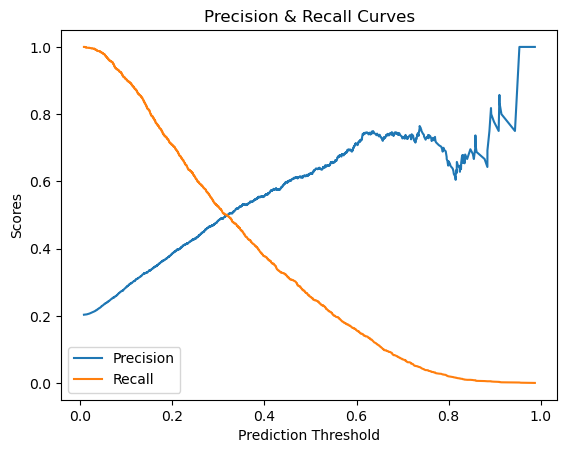

In [115]:
# Plot precision, recal, f1_score curve 
from sklearn.metrics import precision_recall_curve
p_curve, r_curve, t_curve = precision_recall_curve(y_train, lr.predict_proba(X_train)[:, 1])

plt.plot(t_curve, p_curve[:-1], label='Precision')
plt.plot(t_curve, r_curve[:-1], label='Recall')
plt.xlabel('Prediction Threshold')
plt.ylabel('Scores')
plt.legend()
plt.title('Precision & Recall Curves')
plt.show()


In [116]:
# finding the point where the precision is still > .5

In [117]:
import numpy as np

np.where(p_curve > .5)

(array([6377, 6383, 6384, ..., 7998, 7999, 8000]),)

In [118]:
t_curve[6377]

0.319717144936037

In [119]:
confusion_matrix(y_test, lr.predict_proba(X_test)[:, 1] > .32)

array([[1400,  191],
       [ 223,  186]])

In [120]:
precision_score(y_test, lr.predict_proba(X_test)[:, 1]>.32)

0.493368700265252

In [121]:
recall_score(y_test, lr.predict_proba(X_test)[:, 1]>.32)

0.4547677261613692

## Fit and Tune A Random Forest

In [122]:
# fit a random forest model 

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf = rf.fit(X_train, y_train)

print(f"Train Accuracy: {rf.score(X_train, y_train)}") 
print(f"Test Accuracy: {rf.score(X_test, y_test)}")

Train Accuracy: 1.0
Test Accuracy: 0.858


The model was extremely overfit. 

In [ ]:
# tune hyperparameters by cross validation 

from sklearn.model_selection import RandomizedSearchCV 
import numpy as np

rf = RandomForestClassifier(random_state=2023, n_jobs=-1)

params = {
    'n_estimators': np.arange(start=100, stop=1100, step=100), 
    'max_features': [None, "sqrt"],
    'bootstrap': [True],
    'max_samples': [None, .3, .5, .9],
    'max_depth': np.arange(start=1, stop=11, step=1), 
    'min_samples_leaf': [2, 5, 10, 20, 100],
}

grid = RandomizedSearchCV(
    rf,
    params,
    n_iter=100,
    scoring="accuracy"
)

grid.fit(X_train, y_train)

grid.best_params_

{'n_estimators': 600,
 'min_samples_leaf': 5,
 'max_samples': 0.5,
 'max_features': None,
 'max_depth': 9,
 'bootstrap': True}

In [124]:
# fine tune by using GridSearchCV based on the result of RandomizedSearchCV 
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': np.arange(start=550, stop=651, step=10),
    'max_samples': [.4, .5, .6],
    'max_depth': [8, 10, 12],
    'min_samples_leaf': [2, 5, 8],

}

grid = GridSearchCV(
    rf,
    params,
    scoring="accuracy"
)

grid.fit(X_train, y_train)
grid.best_params_

{'max_depth': 12,
 'max_samples': 0.6,
 'min_samples_leaf': 2,
 'n_estimators': 650}

In [ ]:
# # fine tune by using GridSearchCV based on the result of RandomizedSearchCV 
# from sklearn.model_selection import GridSearchCV

# params = {
#     'n_estimators': np.arange(start=550, stop=651, step=10),
#     'max_samples': [.4, .5, .6],
#     'max_depth': [8, 10, 12],
#     'min_samples_leaf': [5, 10, 15],

# }

# grid = GridSearchCV(
#     rf,
#     params,
#     scoring="accuracy"
# )

# grid.fit(X_train, y_train)
# grid.best_params_

In [125]:
# fit the model with the best parameters

rf = RandomForestClassifier (
    **{'n_estimators': 650,
    'min_samples_leaf': 2,
    'max_samples': 0.6, 
    'max_depth': 12, 
    'bootstrap': True})

rf = rf.fit(X_train, y_train)

print (f"Train Accuracy: {rf.score (X_train, y_train)}")
print(f"Test Accuracy: {rf.score (X_test, y_test)}")

Train Accuracy: 0.9085
Test Accuracy: 0.8575


The model reached a higher test accuracy compared to Logistic Regression. 

In [127]:
# plot the roc curve

from sklearn.metrics import roc_curve, auc

y_probs = rf.predict_proba(X_test)[:, 1]

fpr1, tpr1, thresholds = roc_curve(y_test, y_probs) 
auc_score= auc (fpr1, tpr1)

auc_score

0.8490777124995581

## Build a bar chart that shows feature importance

<Axes: xlabel='importance', ylabel='feature'>

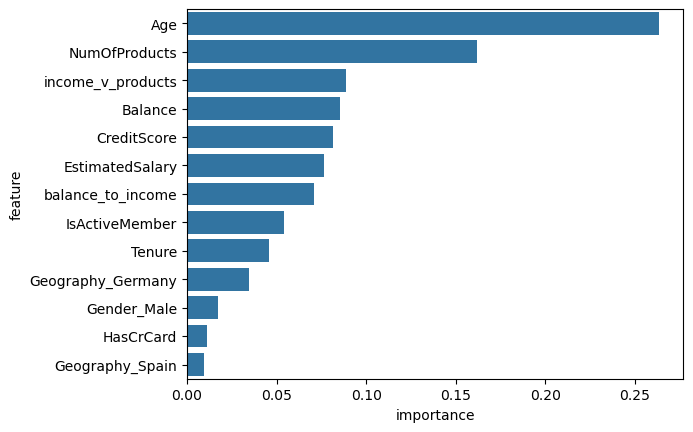

In [129]:
# plot feature importances 

importance = pd.DataFrame(
    {"feature": X_train.columns,
    "importance": rf.feature_importances_} 
).sort_values("importance", ascending=False).iloc[:20]

sns.barplot(importance, x="importance", y="feature")
